In [3]:
pip install scikit-image

     ---------------------------------------- 0.0/59.0 kB ? eta -:--:--
     ---------------------------------------- 59.0/59.0 kB 3.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/22.7 MB ? eta -:--:--
   - -------------------------------------- 1.1/22.7 MB 34.7 MB/s eta 0:00:01
   ----- ---------------------------------- 3.2/22.7 MB 28.6 MB/s eta 0:00:01
   -------- ------------------------------- 5.0/22.7 MB 29.2 MB/s eta 0:00:01
   ----------- ---------------------------- 6.6/22.7 MB 30.2 MB/s eta 0:00:01
   -------------- ------------------------- 8.0/22.7 MB 30.1 MB/s eta 0:00:01
   --------------- ------------------------ 8.7/22.7 MB 27.8 MB/s eta 0:00:01
   ---------------- ----------------------- 9.3/22.7 MB 24.7 MB/s eta 0:00:01
   ----------------- ---------------------- 9.7/22.7 MB 24.8 MB/s eta 0:00:01
   ------------------- -------------------- 10.9/22.7 MB 23.4 MB/s eta 0:00:01
   --------------------- ------------------ 12.3/22.7 MB 24.2 MB/s eta 0:00

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
keras 2.4.3 requires h5py, which is not installed.
dbmsbenchmarker 0.13.1 requires cycler>=0.10.0, which is not installed.
dbmsbenchmarker 0.13.1 requires kiwisolver>=1.2.0, which is not installed.
dbmsbenchmarker 0.13.1 requires matplotlib>=3.1.1, which is not installed.
dbmsbenchmarker 0.13.1 requires pyparsing>=2.4.7, which is not installed.
phaseportrait 1.2.2 requires matplotlib, which is not installed.
dbmsbenchmarker 0.13.1 requires urllib3==1.26.5, but you have urllib3 1.26.19 which is incompatible.


In [7]:
pip install matplotlib

     ---------------------------------------- 0.0/104.4 kB ? eta -:--:--
     -------------------------------------- 104.4/104.4 kB 3.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/7.5 MB ? eta -:--:--
   --------- ------------------------------ 1.8/7.5 MB 37.5 MB/s eta 0:00:01
   -------------------- ------------------- 3.8/7.5 MB 48.7 MB/s eta 0:00:01
   -------------------------------- ------- 6.0/7.5 MB 42.6 MB/s eta 0:00:01
   ---------------------------------------  7.5/7.5 MB 39.9 MB/s eta 0:00:01
   ---------------------------------------  7.5/7.5 MB 39.9 MB/s eta 0:00:01
   ---------------------------------------- 7.5/7.5 MB 28.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/477.9 kB ? eta -:--:--
   --------------------------------------- 477.9/477.9 kB 15.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 1.5/1.5 MB 32.3 MB/s eta 0:00:00
   ----------------

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
dbmsbenchmarker 0.13.1 requires urllib3==1.26.5, but you have urllib3 1.26.19 which is incompatible.


In [422]:
import skimage as ski
import matplotlib.pyplot as plt
import numpy as np

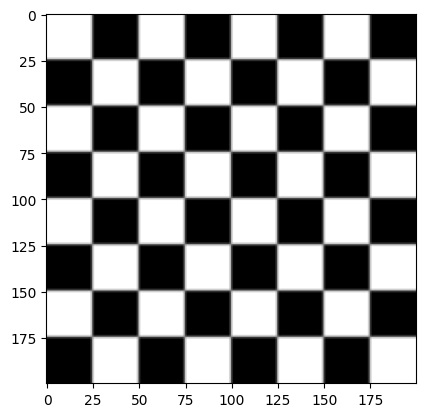

In [423]:
checker_board_image = ski.data.checkerboard()

plt.imshow(checker_board_image, cmap='gray')

In [424]:
class lines:
    def __init__(self, start_pos, end_pos):
        self.start_pos = start_pos
        self.end_pos = end_pos
        self.steigung = self.__berechne_steigung()
        self.t = self.__berechne_t()
        
    def __berechne_steigung(self):
        return (self.end_pos[1] - self.end_pos[0]) / (self.start_pos[1] - self.start_pos[0])

    def __berechne_t(self):
        return self.start_pos[1] - (self.steigung*self.start_pos[0])

    def berechne_punkt_linie(self, x):
        punkt = (self.steigung * x) + self.t
        return punkt

    def __str__(self):
        return f"gerade Gleichung ist: {self.steigung}*x" + " +" + f"{self.t}"
        
        

In [425]:
def corner_min_max(matrix, corner_0, corner_1, corner_2, corner_3): #funktion gibt den minimalen x wert und den maximalen X aus
    corner_0_neu = matrix@corner_0
    corner_1_neu = matrix@corner_1
    corner_2_neu = matrix@corner_2
    corner_3_neu = matrix@corner_3

    new_corners = np.round(np.array([corner_0_neu, corner_1_neu, corner_2_neu, corner_3_neu])).astype(int)

    x_min = np.min(new_corners[:,0])
    x_max = np.max(new_corners[:,0])

    y_min = np.min(new_corners[:,1])
    y_max = np.max(new_corners[:,1])

    return x_min, x_max, y_min, y_max

def define_circle(img):
    width, height = img.shape[0], img.shape[1]
    zentrum = np.array([int(width/2), int(width/2)])
    radius = np.sqrt(((width - zentrum[0])**2) + ((height - zentrum[1])**2))
    thetha = np.linspace(0, 2*np.pi, 100)
    x = zentrum[0] + radius*np.cos(thetha)
    y = zentrum[1] + radius*np.sin(thetha)

    return x, y, zentrum, radius

def get_start_lines(img, amount_lines):
    x, y, zentrum, radius = define_circle(img)
    x_values = np.linspace(zentrum[0] - radius, zentrum[0] + radius, amount_lines)
    start_lines = []
    for x in x_values:
    # y-Werte berechnen, wo die Gerade den Kreis schneidet:
        y_offset = np.sqrt(radius**2 - (x - zentrum[0])**2)
        y1 = zentrum[1] - y_offset
        y2 = zentrum[1] + y_offset
        start_lines.append([[x, x], [y1, y2]])
    return start_lines

def rotate_lines(lines, winkel):
    test = np.array(lines)
    rotate_matrix = np.array([[np.cos(np.radians(winkel)), -np.sin(np.radians(winkel))], [np.sin(np.radians(winkel)), np.cos(np.radians(winkel))]])

    x_min, x_max, y_min, y_max = corner_min_max(rotate_matrix, np.array([0, 0]), np.array([0, 200]), np.array([200, 0]), np.array([200, 200]))

    rotation_lines = rotate_matrix@lines

    #t_x = 0 - x_min
    #t_y = 0 - y_min

    #Transformationsmatrix = np.eye(3)

    #Transformationsmatrix[:2, :2] = rotate_matrix
    
    #Transformationsmatrix[0, 2] = t_x
    #Transformationsmatrix[1, 2] = t_y

    #lines_matrix = np.zeros((len(lines), 3, 3))
    #lines_matrix[:, :2, :2] = lines  # Rotation einfügen
    #lines_matrix[:, 2, 2] = 1   

    verschiebung = np.array([[-x_min, -x_min], [-y_min, -y_min]])

    return rotation_lines + verschiebung

In [426]:
x,y,zentrum,radius = define_circle(checker_board_image)

In [471]:
lines2 = np.array(get_start_lines(checker_board_image, 25))
test = rotate_lines(lines2, 45) 

In [473]:
line = lines(test[0, :, :1].reshape(1,2)[0], test[0, :, 1:].reshape(1,2)[0])

In [474]:
line.steigung

1.0

In [475]:
print(line)

gerade Gleichung ist: 1.0*x +0.421356237309503


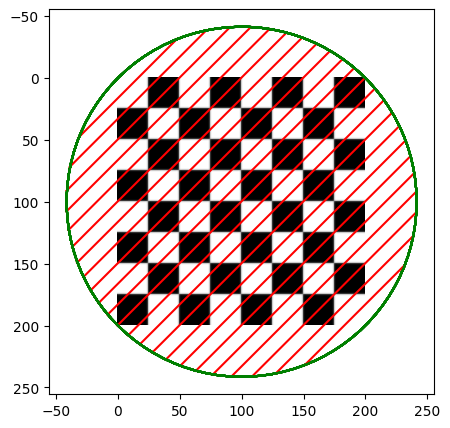

In [476]:
fig, ax = plt.subplots(figsize=(8, 5))
for i in range(len(test)):
    ax.imshow(checker_board_image, cmap='gray')
    ax.plot(test[i, :][0] - (radius - 100), test[i, :][1] - (radius - 100), color='red')
    #ax.plot(lines2[i, :][0], lines2[i, :][1], color='red')
    ax.plot(x,y, color='green')

plt.show()